In [179]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_widths
from pyopenms import *

In [15]:
path = 'data'

data = []
names = []
for filename in os.listdir(path):
    f = open('data/{}'.format(filename))
    tmp = []
    for line in f:
        tmp.append(list(map(float, line.split())))
    data.append(np.array(tmp))
    names.append(filename)


In [22]:
sorted(names)

['LIN_100_100ns0_B211Lin_1.txt',
 'LIN_50_100ns0_B211Lin_2.txt',
 'LIN_60_100ns0_B211Lin_3.txt',
 'LIN_70_100ns0_B211Lin_4.txt',
 'LIN_80_0ns0_B211Lin_5.txt',
 'LIN_80_100ns0_B211Lin_6.txt',
 'LIN_80_150ns0_B211Lin_7.txt',
 'LIN_80_200ns0_B211Lin_8.txt',
 'LIN_80_300ns0_B211Lin_9.txt',
 'LIN_80_400ns0_B211Lin_10.txt',
 'LIN_80_500ns0_B211Lin_11.txt',
 'LIN_80_50ns0_B211Lin_12.txt',
 'LIN_80_600ns0_B211Lin_13.txt',
 'LIN_80_700ns0_B211Lin_14.txt',
 'LIN_80_800ns0_B211Lin_15.txt',
 'LIN_90_100ns0_B211Lin_16.txt',
 'REF_100_100ns0_B221Ref_18.txt',
 'REF_50_100ns0_B231Ref_21.txt',
 'REF_60_100ns0_B211Ref_24.txt',
 'REF_70_100ns0_B211Ref_25.txt',
 'REF_80_0ns0_B211Ref_26.txt',
 'REF_80_100ns0_B211Ref_27.txt',
 'REF_80_150ns0_B211Ref_28.txt',
 'REF_80_200ns0_B211Ref_29.txt',
 'REF_80_250ns0_B211Ref_30.txt',
 'REF_80_300ns0_B211Ref_31.txt',
 'REF_80_50ns0_B211Ref_32.txt',
 'REF_90_100ns0_B211Ref_33.txt']

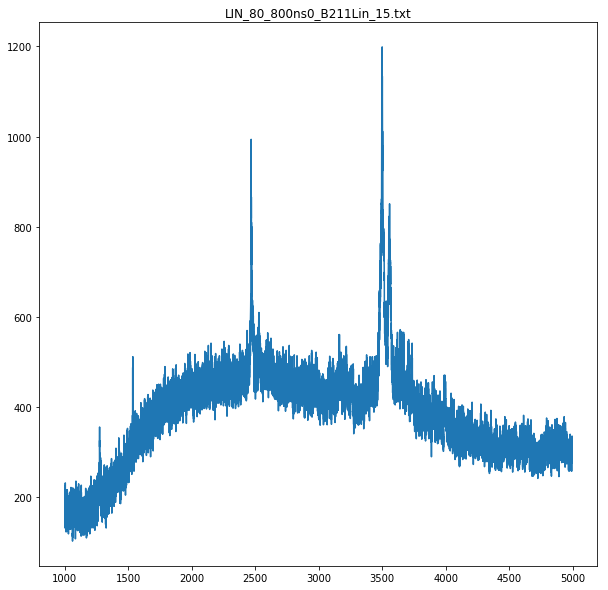

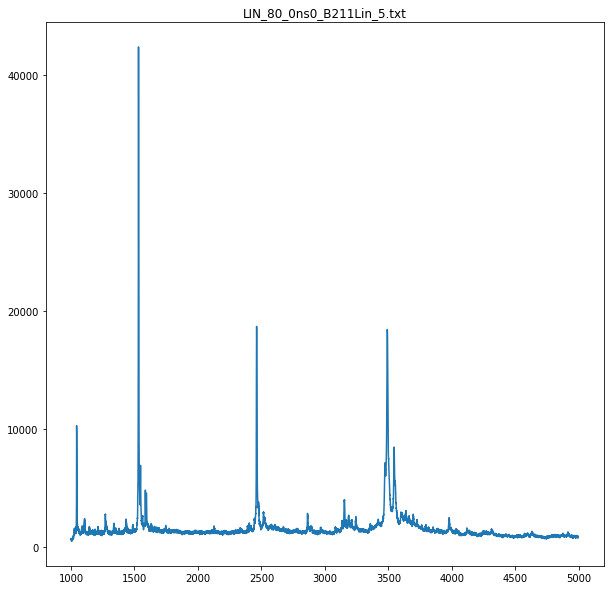

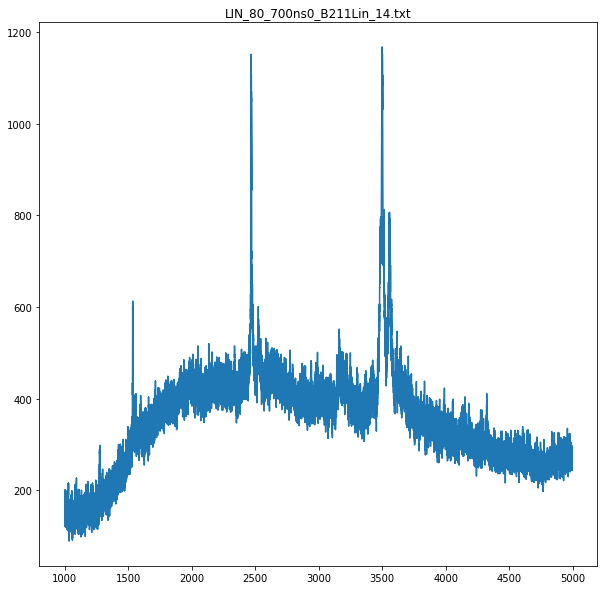

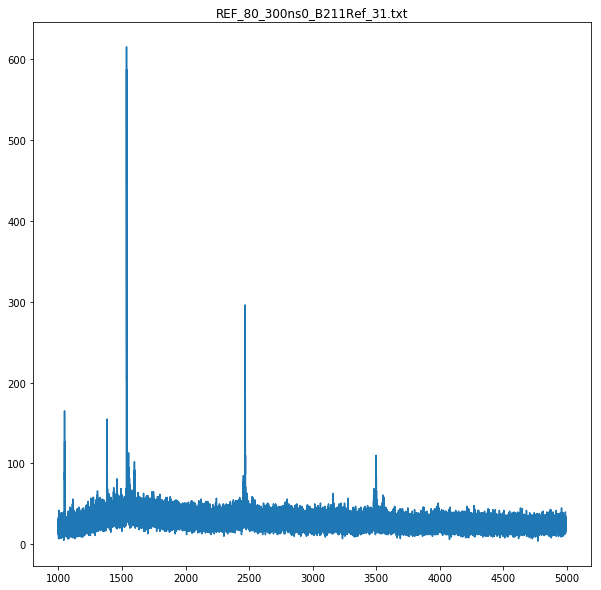

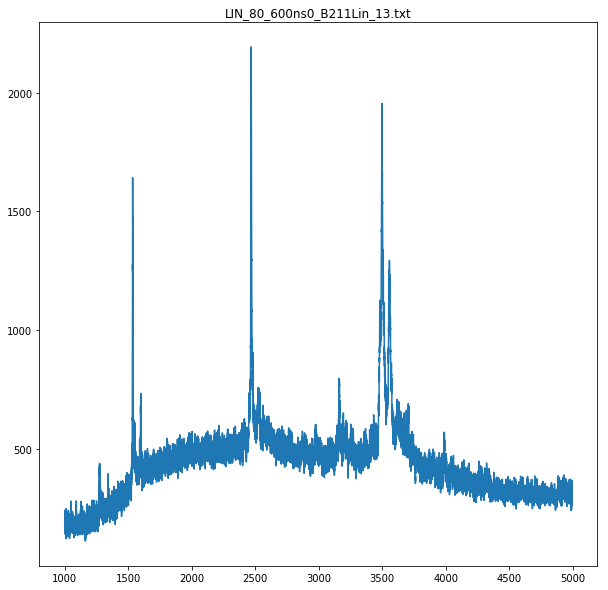

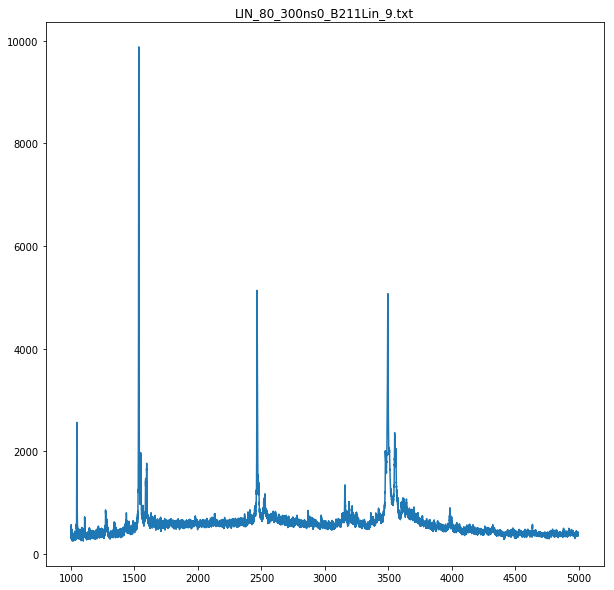

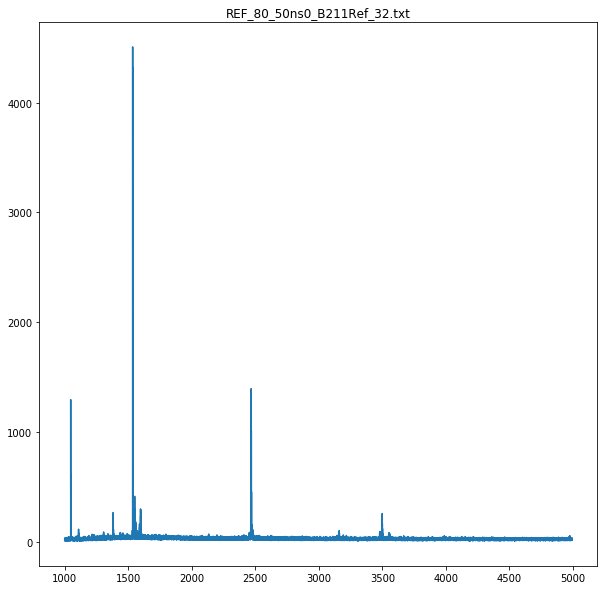

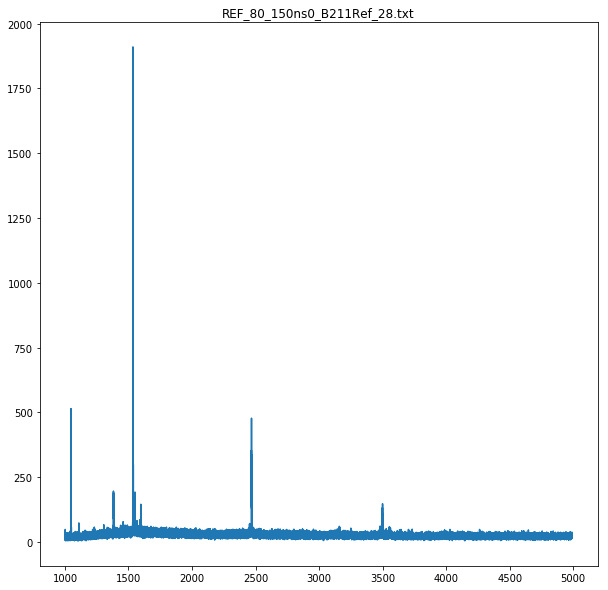

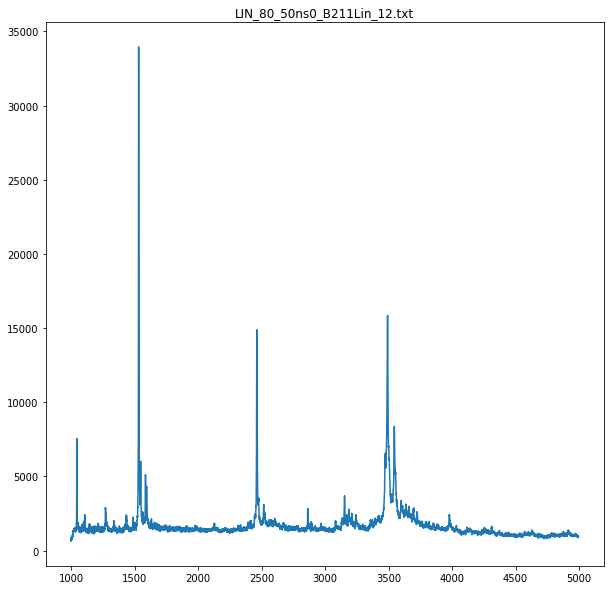

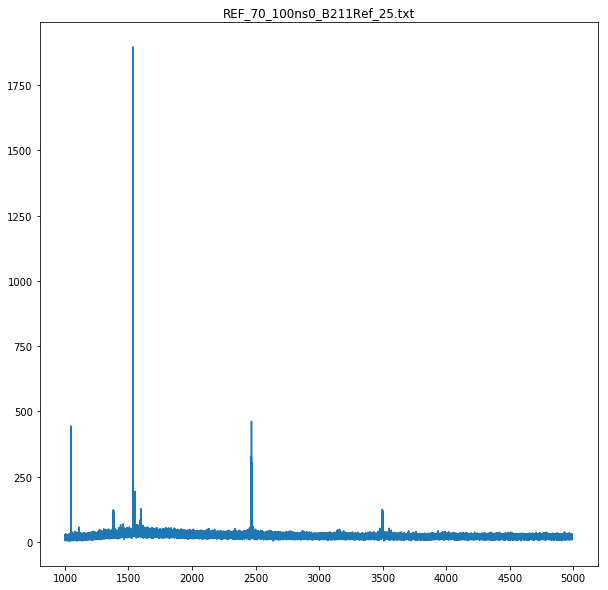

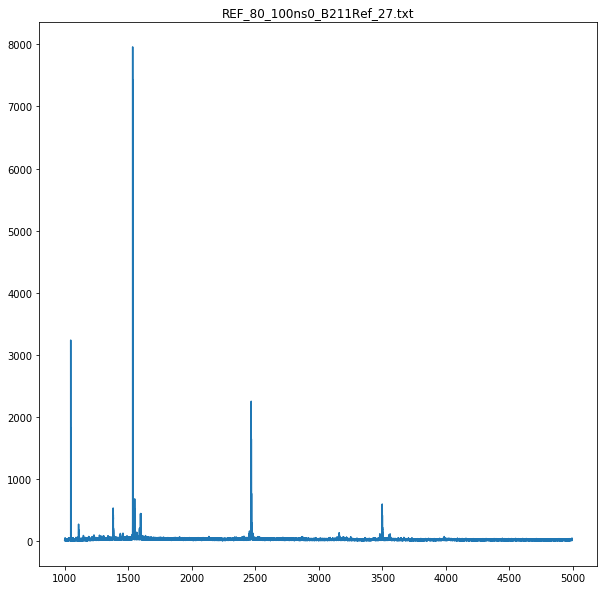

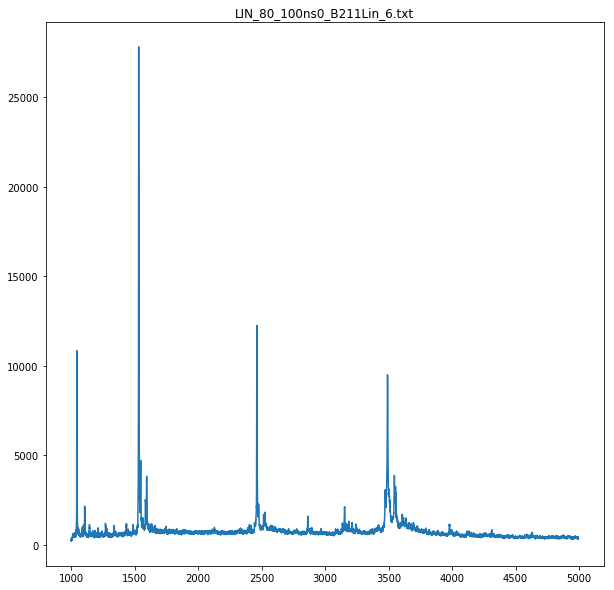

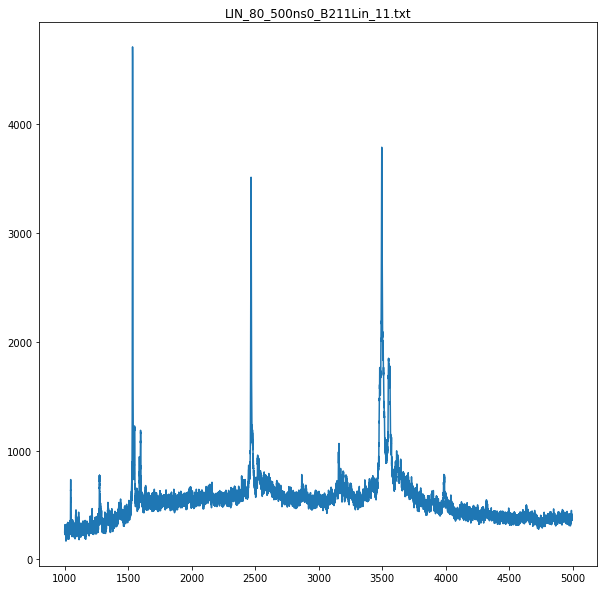

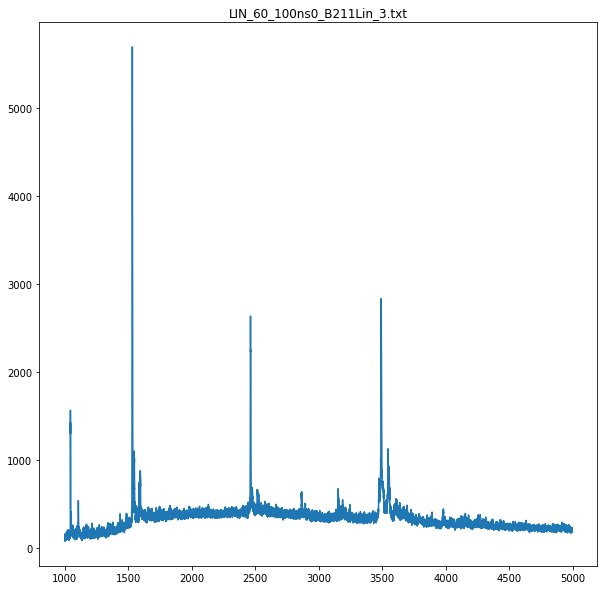

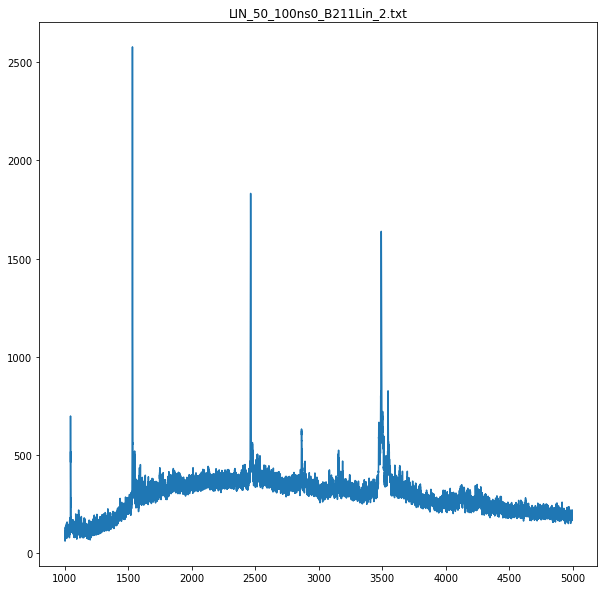

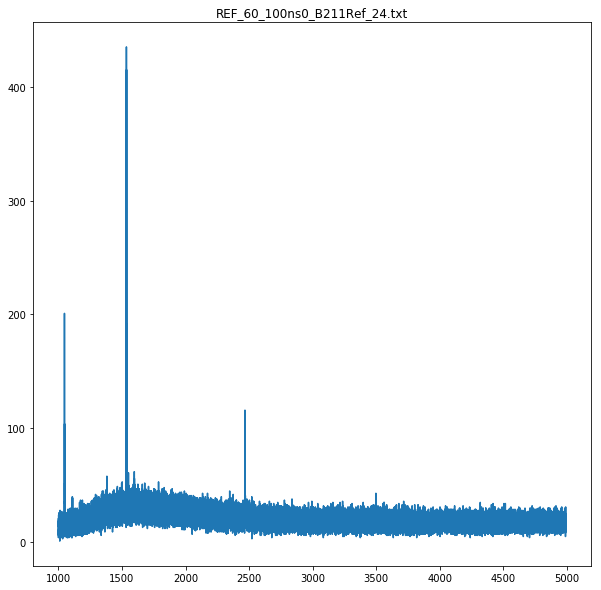

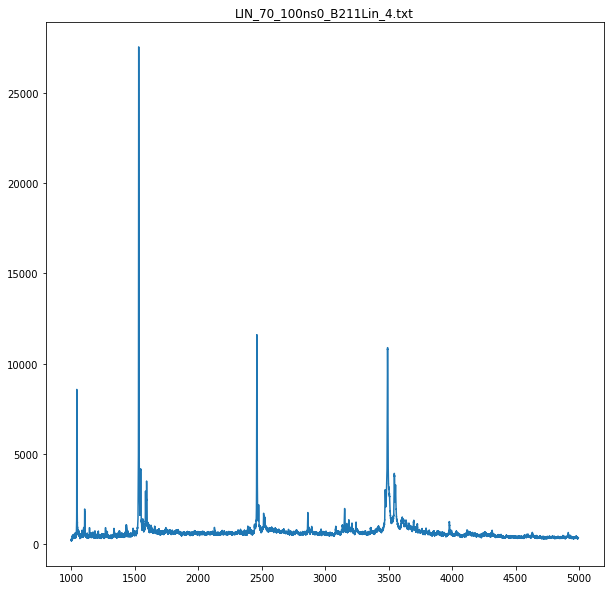

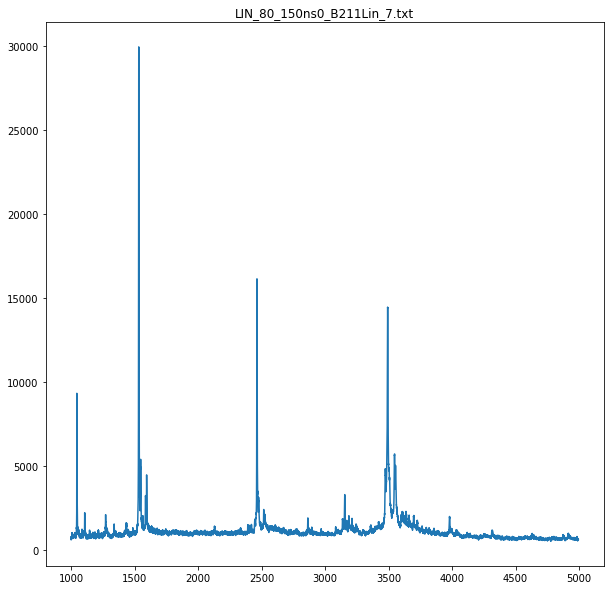

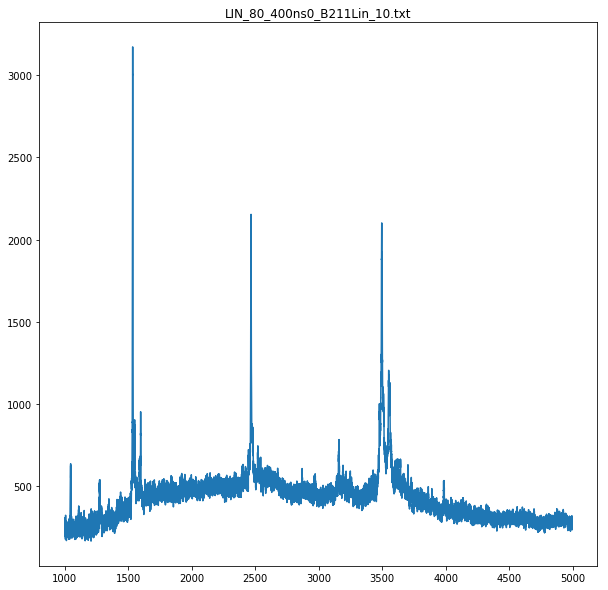

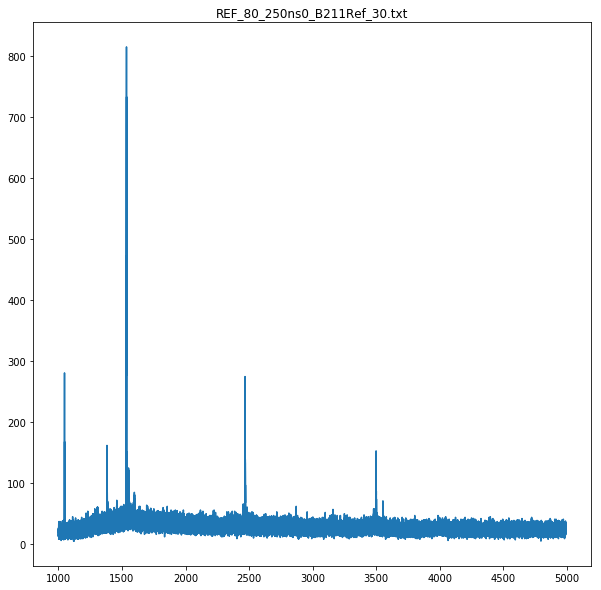

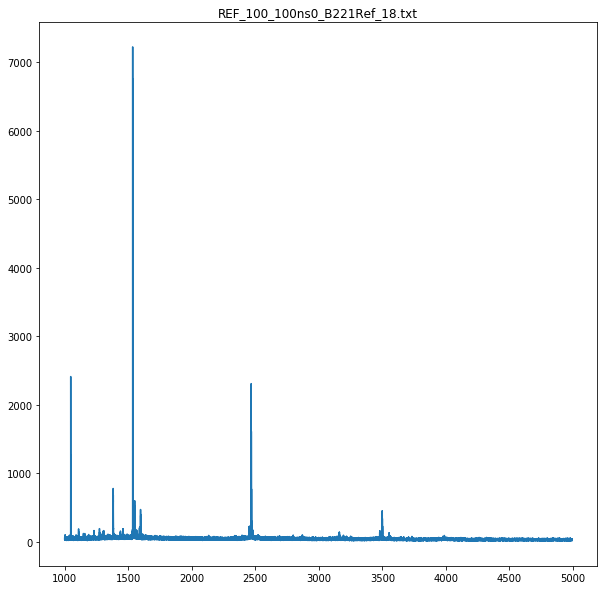

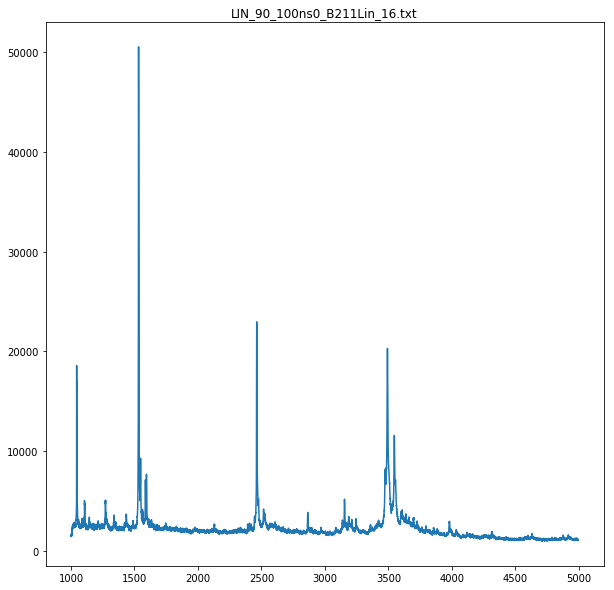

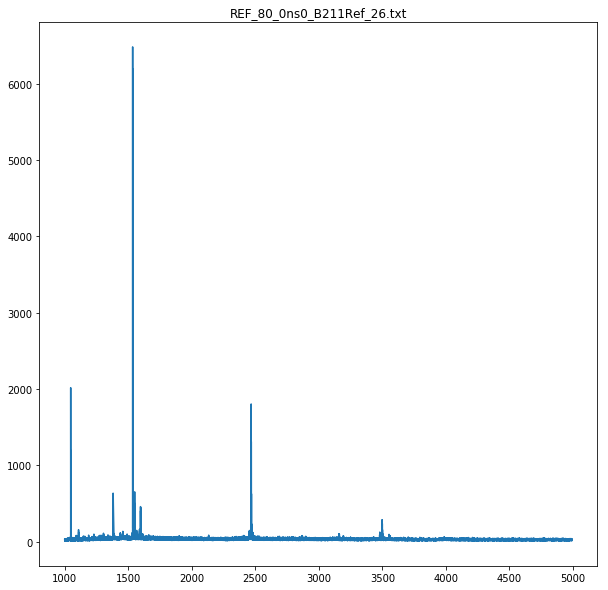

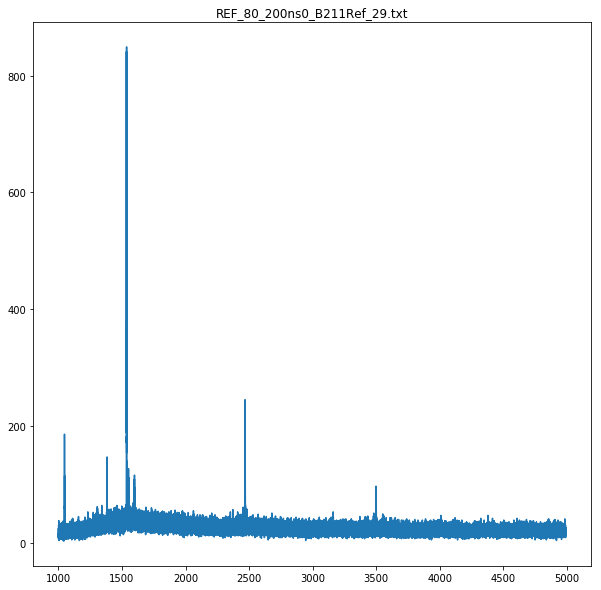

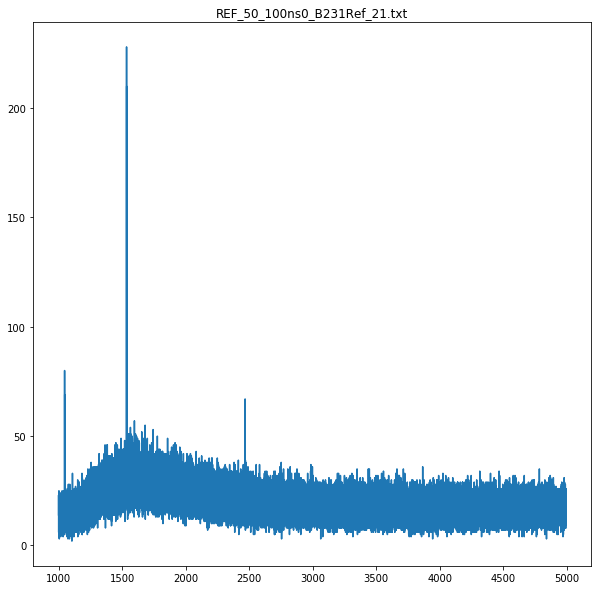

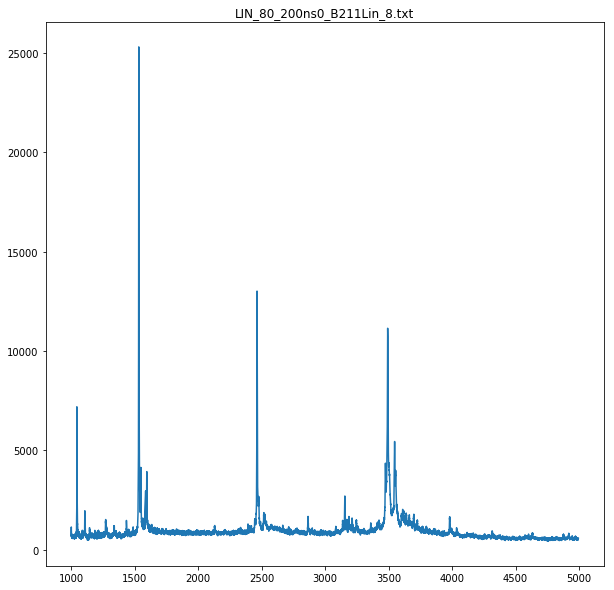

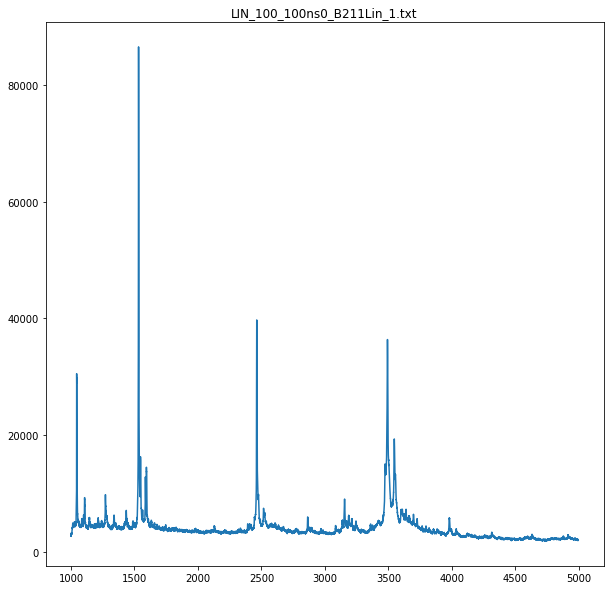

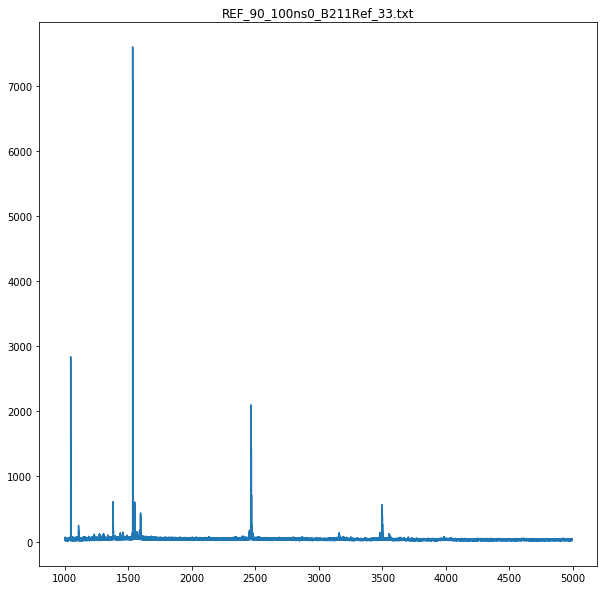

In [16]:
i = 0
for x in names:
    plt.figure(figsize=(10, 10))
    plt.plot(data[i][:, 0], data[i][:, 1])
    plt.title(x)
    i += 1

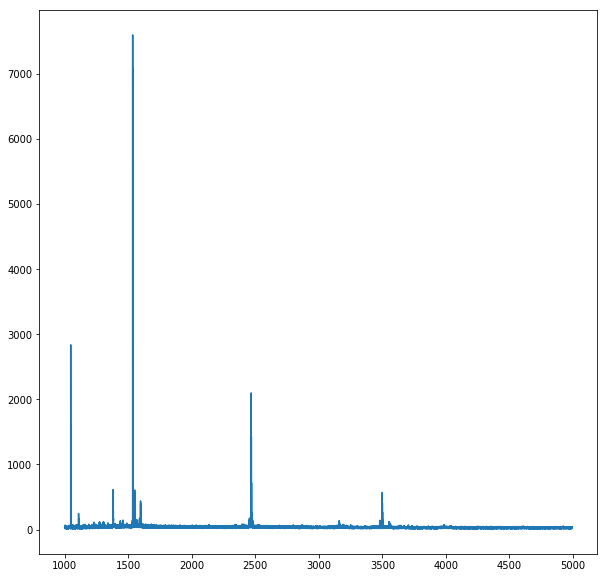

In [56]:
tt = data[-1]
plt.figure(figsize=(10, 10))
plt.plot(tt[:, 0], tt[:, 1])

In [129]:
from scipy.interpolate import interp1d

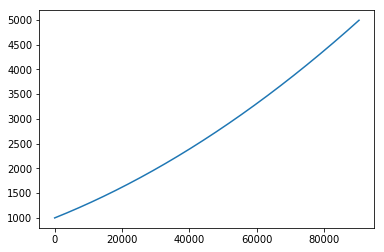

In [128]:
indexes = np.arange(0, len(tt[:, 0]), 1)
plt.plot(indexes, tt[:, 0])

In [166]:
f = interp1d(indexes, tt[:, 0])
f_rev = interp1d(tt[:, 0], indexes)

In [176]:
peaks, _ = find_peaks(tt[:, 1], height=350, distance=100)
all_peaks, _ = find_peaks(tt[:, 1], height=350, distance=10)
all_peaks_half_width = peak_widths(tt[:, 1], all_peaks, rel_height=0.5)

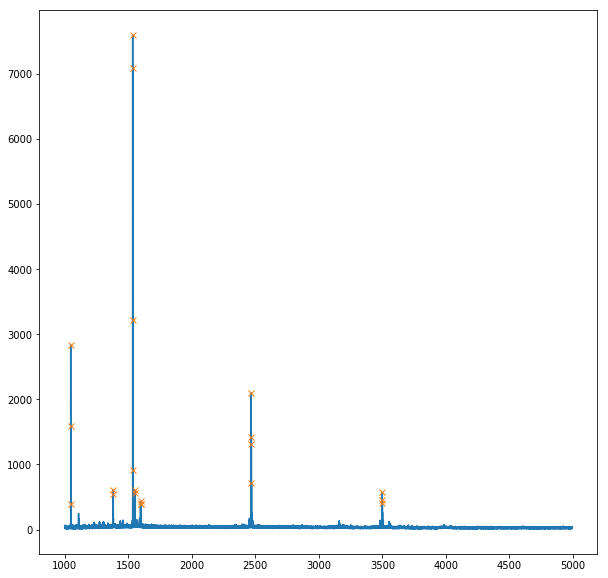

In [177]:
plt.figure(figsize=(10, 10))
plt.plot(tt[:, 0], tt[:, 1])
plt.plot(tt[all_peaks, 0], tt[all_peaks, 1], 'x')
plt.hlines(all_peaks_half_width[1], f(all_peaks_half_width[2]), f(all_peaks_half_width[3]), color="g")
#plt.xlim(1045, 1050)
plt.show()

In [168]:
def what_index(x, xmin, xmax, ref):
    result = []
    for elem in ref:
        if  xmin <= x[elem] <= xmax:
            result.append(elem)
    return result

In [164]:
all_peaks

array([ 1718,  1754,  1790, 12861, 12863, 12867, 12870, 12886, 12889,
       12892, 12894, 12897, 17528, 17558, 17588, 17618, 18001, 18031,
       19344, 19346, 19373, 19375, 19403, 41843, 41866, 41891, 41913,
       63795, 63814, 63833, 63835])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1190: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


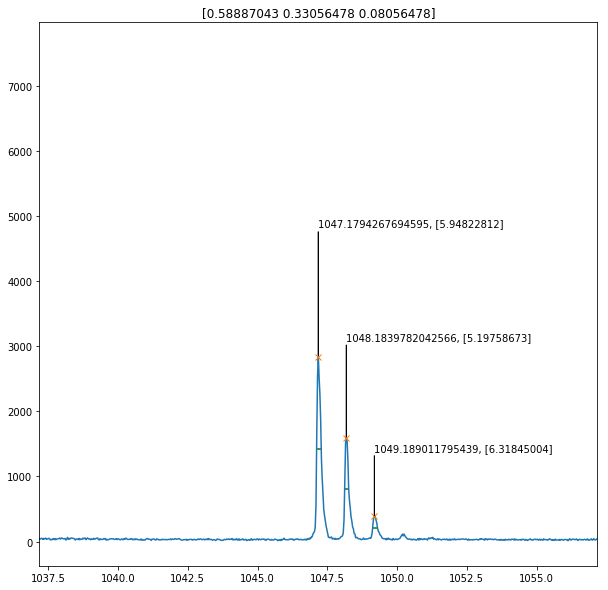

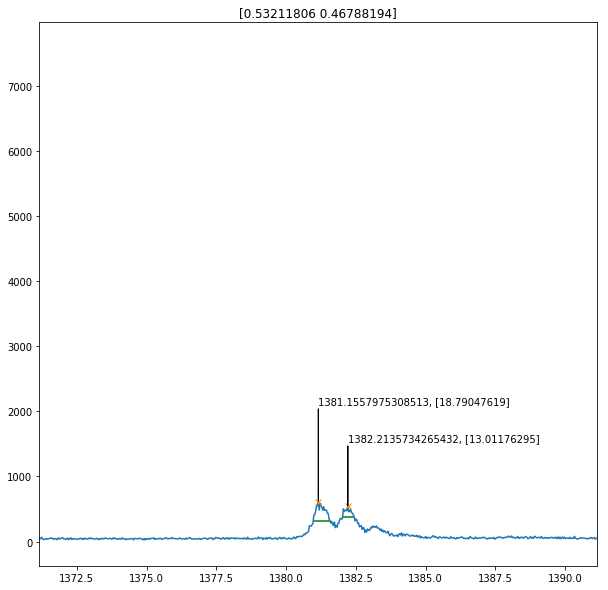

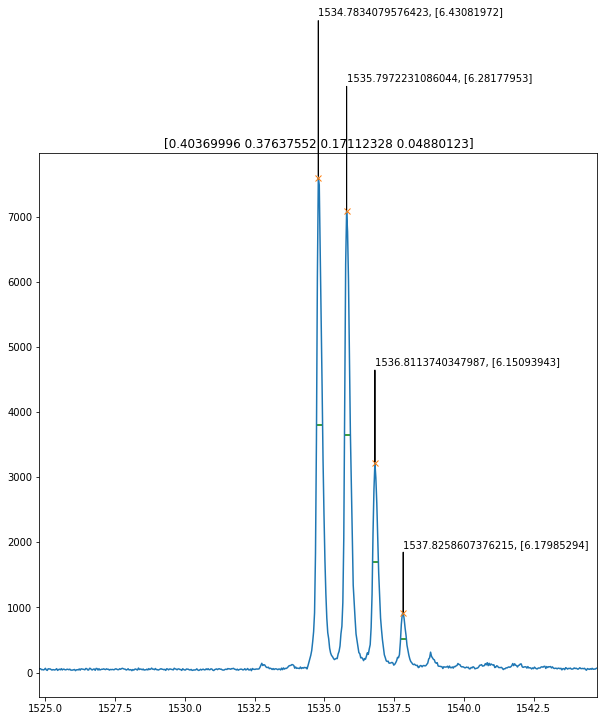

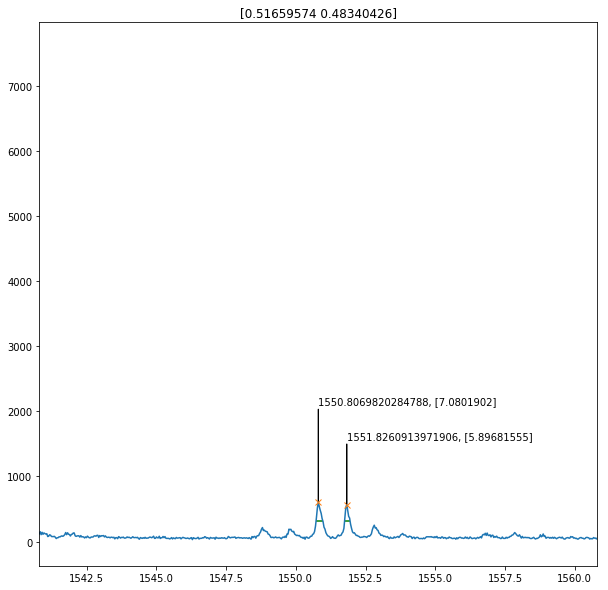

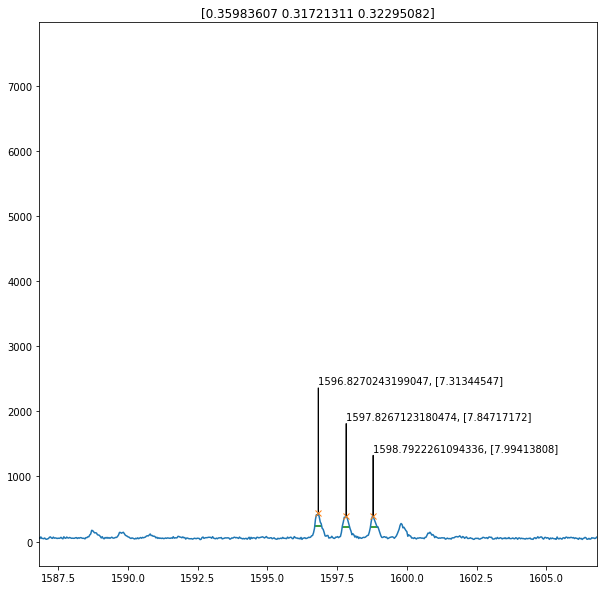

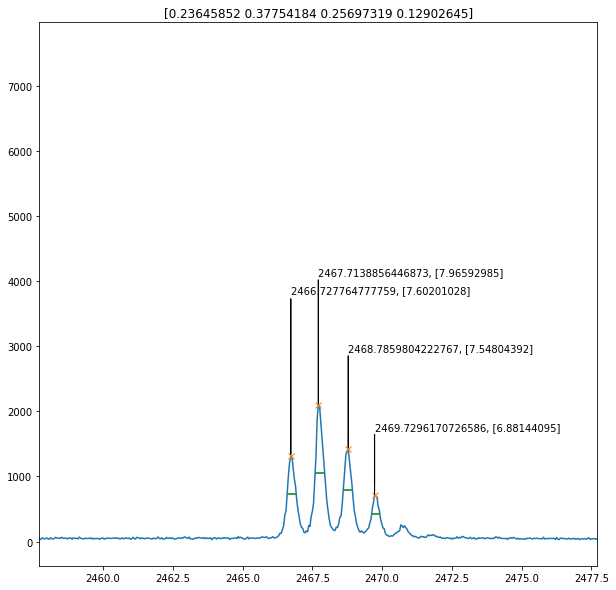

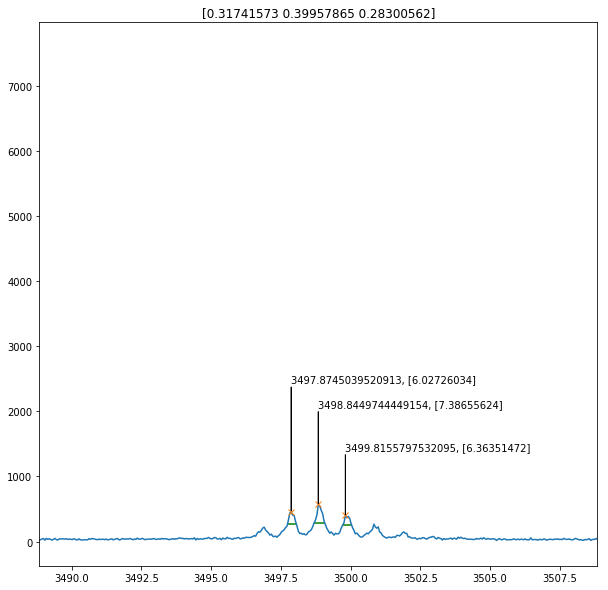

In [186]:
for i in range(len(peaks)):    
    plt.figure(figsize=(10, 10))
    plt.plot(tt[:, 0], tt[:, 1])
    plt.plot(tt[all_peaks, 0], tt[all_peaks, 1], 'x')
    plt.xlim(tt[peaks[i], 0] - 10, tt[peaks[i], 0] + 10)
    index_peaks = what_index(tt[:, 0], tt[peaks[i], 0] - 10, tt[peaks[i], 0] + 10, all_peaks)
    l = len(index_peaks) + 1
    for ind in index_peaks:
        j = np.argwhere(all_peaks==ind)[0]
        plt.annotate('{}, {}'.format(tt[ind, 0], all_peaks_half_width[0][j]),
                    xy=(tt[ind, 0], tt[ind, 1]), 
                    xytext=(tt[ind, 0], tt[ind, 1]+500*l),
                    arrowprops=dict(facecolor='black', shrink=0.01, width=0.2, headwidth=0.2))
        l -= 1
    plt.hlines(all_peaks_half_width[1], f(all_peaks_half_width[2]), f(all_peaks_half_width[3]), color="g")
    plt.title(tt[index_peaks, 1] / tt[index_peaks, 1].sum())

In [206]:
carbon = ['C{}'.format(n) for n in range(1, 200)]
for i in range(len(carbon)):
    carbon[i] = EmpiricalFormula(carbon[i])
    isotopes = carbon[i].getIsotopeDistribution( CoarseIsotopePatternGenerator(4) )
    print('#', i, carbon[i].toString(),':')
    for iso in isotopes.getContainer():
        print (iso.getMZ(), ":", iso.getIntensity())

# 0 b'C1' :
12.0 : 0.989300012588501
13.0033548378 : 0.010700000450015068
# 1 b'C2' :
24.0 : 0.9787144660949707
25.0033548378 : 0.021171020343899727
26.0067096756 : 0.00011449000157881528
# 2 b'C3' :
36.0 : 0.9682422280311584
37.0033548378 : 0.03141673654317856
38.0067096756 : 0.0003397948748897761
39.010064513399996 : 1.2250430927451816e-06
# 3 b'C4' :
48.0 : 0.9578820466995239
49.0033548378 : 0.04144077003002167
50.0067096756 : 0.0006723181577399373
51.010064513399996 : 4.847740456170868e-06
# 4 b'C5' :
60.0 : 0.9476327896118164
61.0033548378 : 0.05124669149518013
62.0067096756 : 0.0011085406877100468
63.010064513399996 : 1.1989674021606334e-05
# 5 b'C6' :
72.0 : 0.9374932050704956
73.0033548378 : 0.06083803251385689
74.0067096756 : 0.001645019045099616
75.0100645134 : 2.3722770492895506e-05
# 6 b'C7' :
84.0 : 0.9274622797966003
85.0033548378 : 0.07021825760602951
86.0067096756 : 0.0022783849854022264
87.0100645134 : 4.107065251446329e-05
# 7 b'C8' :
96.0 : 0.9175388216972351
97.0033

In [205]:
n = 189
target = EmpiricalFormula("C{}H{}".format(n, n))

target.getMonoWeight()

2458.4789310291